# Run py12box model
Run the AGAGE 12-box model

In [1]:
%load_ext autoreload
%autoreload 2

# Import some standard libraries
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from pandas import read_csv

# Import from this package
sys.path.insert(0, "../../")
from py12box.model import Model


In [2]:
# Initialise the model
mod = Model("CFC-11", Path("../data/example"))


Compiling model...
... done in 8.957317113876343 s


In [3]:
# Run model
mod.run()

... done in 0.03274703025817871 s


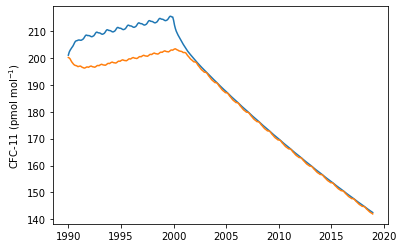

In [4]:
plt.plot(mod.time, mod.mf[:, 0])
plt.plot(mod.time, mod.mf[:, 3])
plt.ylabel("%s (pmol mol$^{-1}$)" % mod.species)
plt.show()

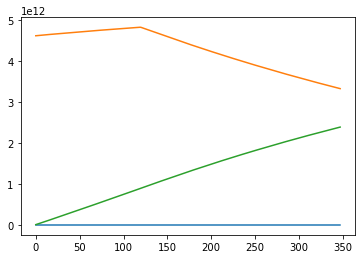

In [5]:
plt.plot(mod.emissions.sum(axis = 1).cumsum())
plt.plot(mod.burden.sum(axis = 1))
plt.plot(mod.losses["other"].sum(axis = 1).cumsum())

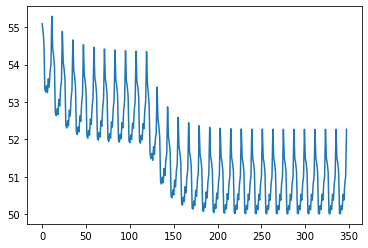

In [6]:
plt.plot(mod.lifetimes["global_total"])